<a href="https://colab.research.google.com/github/abulhasanat/NLP-Experiments/blob/master/Inspect_BERT_Vocabulary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Model


Install the huggingface implementation.

In [4]:
!pip install pytorch-pretrained-bert

In [75]:
import torch
from pytorch_pretrained_bert import BertTokenizer

# Load pre-trained model tokenizer (vocabulary)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

100%|██████████| 871891/871891 [00:01<00:00, 802283.51B/s]


## Inspect BERT Vocabulary
--------------------------

### Vocab Dump
--------------

Retrieve the entire list of "tokens" and write these out to text files so we can peruse them.

In [76]:
with open("vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer.vocab.keys():
        
        # Write it out and escape any unicode characters.            
        f.write(token + '\n')


In [77]:
len(tokenizer.vocab)
--119547

119547

From perusing the vocab, I'm seeing that:

* The first 999 tokens (1-indexed) appear to be reserved, and most are of the form [unused957].
    * 1   - [PAD]
    * 101 - [UNK]
    * 102 - [CLS]
    * 103 - [SEP]
    * 104 - [MASK]
* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, presumably the most common subword.
    * The last whole word is at 29612, "necessitated"

Some funny inclusions:
* starbucks
* triassic
* abolitionist
* 1679

### Single Characters
---------------------

The following code prints out all of the single character tokens in vocabulary, as well as all of the single-character tokens preceded by '##'.

It turns out that these are matching sets--for every standalone character there is also a '##' version. There are 997 single character tokens.

The following cell iterates over the vocabulary, pulling out all of the single character tokens.

In [57]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)


In [58]:
print('Number of single character tokens:', len(one_chars), '\n')

# Print all of the single characters, 40 per row.

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(one_chars[i:end]))

Number of single character tokens: 9998 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ A B C D E F G H
I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ a b c d e f g h i j k l m n o p q
r s t u v w x y z { | } ~ ¡ ¢ £ ¥ ¦ § ¨ © ª « ¬ ® ° ± ² ³ µ ¶ · ¹ º » ¼ ½ ¾ ¿ À
Á Â Ã Ä Å Æ Ç È É Ê Ë Ì Í Î Ð Ñ Ò Ó Ô Õ Ö × Ø Ú Ü Ý Þ ß à á â ã ä å æ ç è é ê ë
ì í î ï ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ ÿ Ā ā Ă ă Ą ą Ć ć Č č Ď ď Đ đ Ē ē Ĕ ĕ Ė ė
ę ě Ğ ğ ġ Ģ ģ Ħ ħ ĩ Ī ī Į į İ ı Ķ ķ ĺ Ļ ļ Ľ ľ Ł ł ń Ņ ņ ň ŉ ŋ Ō ō ŏ Ő ő Œ œ ŕ Ř
ř Ś ś Ş ş Š š Ţ ţ Ť ť ũ Ū ū ŭ ů Ű ű ų ŵ ŷ Ź ź Ż ż Ž ž Ə ƒ ơ Ư ư ǎ ǐ ǔ ǫ ǹ Ș ș Ț
ț ɐ ɑ ɔ ɕ ə ɛ ɡ ɣ ɨ ɪ ɲ ɾ ʁ ʃ ʊ ʎ ʒ ʔ ʙ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ̀ ́ ̃ ̄ ̍ ̥ ̧
̲ ͡ ΄ Ά Έ Ή Ί Ό Ύ Ώ ΐ Α Β Γ Δ Ε Ζ Η Θ Ι Κ Λ Μ Ν Ξ Ο Π Ρ Σ Τ Υ Φ Χ Ψ Ω ά έ ή ί α
β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ϊ ϋ ό ύ ώ Ё Ђ Ѓ Є Ѕ І Ї Ј Љ Њ Ћ
Ќ Ў Џ А Б В Г Д Е Ж З И Й К Л М Н О П Р С Т У Ф Х Ц Ч Ш Щ Ъ Ы Ь Э Ю Я а б в г д
е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я ѐ ё ђ ѓ є ѕ і ї ј љ њ ћ 

In [59]:
print('Number of single character tokens with hashes:', len(one_chars_hashes), '\n')

# Print all of the single characters, 40 per row.

# Strip the hash marks, since they just clutter the display.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# For every batch of 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(tokens) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(tokens[i:end]))

Number of single character tokens with hashes: 9998 

s e a n i t r o u m y l d k а и е у h g м н ی ы z о é c т і х ة й я ه p ה j ا ó
b 의 ي ă v ו ς ת ت к с л р 에 י в í f ن ю ą 을 の د á ر x م ı 2 S A 이 д 1 à г ų ь C
w 3 ë 은 が ी 0 ם 년 ل ę ը ן ů 4 ä 는 п ب T س 한 P র ł و ш 5 ে ा ר 6 ի ն ہ ò E 로 R B
I 가 ל 7 に ს L 9 を ў 8 O G ý न ā ć D ز ї 를 M N र े ə F з ა は ش ě ú と 고 ン ف ع q ک
ल K ন ч V ס ى त ق 과 ė 다 ° ے U ж 인 া ד 도 ב क ц ದ ス ি で є 기 ð ٔ ü ט H 서 ル ك 지 ק ő
ι б ף ג 스 ء ح č ש 와 ν X 리 ј ա ח ť ş ᵉ ә ि 사 어 ج ց W ੀ ী ক α న ں ע ž ಿ ი も ల ì è
ಯ ç स 된 ল ਰ ο ত ù ф ӣ ం ो ң 자 ĕ ਨ ਾ ನ ೆ א म य қ 장 ー თ ト Z ं 시 ರ ु ಕ 게 ń ન り 원 ು
ط ű ז š 대 ण 해 ս ી 부 υ ਕ ズ ү Y る К ム С ા 적 し ट 할 회 면 상 ം ö ಾ ך დ ই 드 ম ր ി व ൽ ē
ર త į 트 ய い կ ք η ે স º ץ క ī ൻ ō ض J ਲ ラ ص ா ੇ द گ ો ñ ు ド ٹ տ ా か ू ई て ო ి 수
ث ê イ น П ρ ু ô ً 주 å લ ো 나 ク خ ್ 정 전 ਤ 명 き А ί У च 아 ე ह 성 ક 구 λ ਣ ż ۰ ά غ 라 า
군 ლ ม ª ज ß ө ತ ன দ ০ み ० ే 제 ை ਮ լ ക پ ո ნ ã О Р 히 प ർ ア 화 ี ও ब ာ ു 일 യ ಣ ก ै
선 э ট ّ τ ీ щ մ 치 진 ん ு ત Б მ ら 동 간 く ே ロ వ ۵ 만 య ง Q ৫ ό ň դ コ ৭ 

In [60]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? True


### Subwords vs. Whole-words
Let's gather some statistics on the vocabulary.



Maximum token length: 22


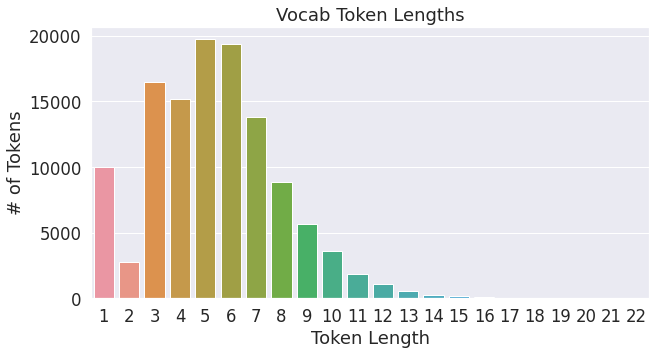

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

Let's look at just the tokens which begin with '##'.

In [64]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)


How many '##' tokens are there vs. the full vocab?

In [65]:
vocab_size = len(tokenizer.vocab.keys())

print('Number of subwords: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calculate the percentage of words that are '##' subwords.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Number of subwords: 43,606 of 119,547
36.5%


Plot the subword lengths (not including the two '##' characters).

Text(0, 0.5, '# of ## Subwords')

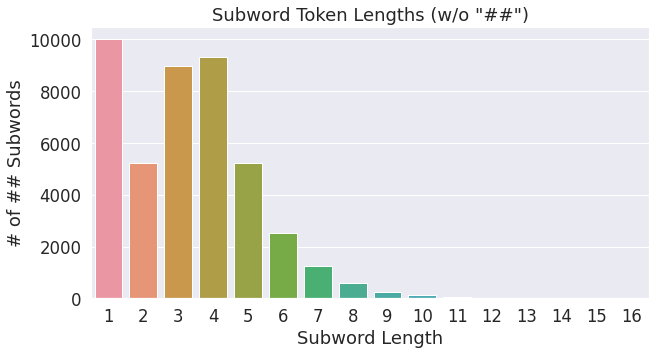

In [66]:
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('# of ## Subwords')

### Misspellings

In [67]:
'misspelled' in tokenizer.vocab # Right

False

In [68]:
'mispelled' in tokenizer.vocab # Wrong

False

In [69]:
'government' in tokenizer.vocab # Right

True

In [30]:
'goverment' in tokenizer.vocab # Wrong

False

In [31]:
'beginning' in tokenizer.vocab # Right

True

In [32]:
'begining' in tokenizer.vocab # Wrong

False

In [33]:
'separate' in tokenizer.vocab # Right

True

In [34]:
'seperate' in tokenizer.vocab # Wrong

False

In [78]:
'জল' in tokenizer.vocab # Wrong

False

What about contractions?

In [35]:
"can't" in tokenizer.vocab

False

In [36]:
"cant" in tokenizer.vocab

False

### Start vs. Mid Subwords

For single characters, there are both the individual character and the '##' version for every character. Is the same true of subwords?

In [37]:
# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for ly


In [42]:
'##ly' in tokenizer.vocab

True

In [ ]:
'ly' in tokenizer.vocab

False

### Names



In [43]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6ee6b3a243bdbe030f8963a83f02ab56006d984577e33c557771120dbf92785c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [44]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names.txt'

In [45]:
# Read them in.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Decode the names, convert to lowercase, and strip newlines.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Number of names: {:,}'.format(len(names)))
print('Example:', random.choice(names))


Number of names: 21,985
Example: mayer


In [46]:
num_names = 0

# For each name in our list...
for name in names:

    # If it's in the vocab...
    if name in tokenizer.vocab:
        # Tally it.
        num_names += 1

print('{:,} names in the vocabulary'.format(num_names))

3,869 names in the vocabulary


**Further Research**
* Add more modern names
    * This repo / file contains some more modern names. The file download isn't working, though.
    * `https://raw.githubusercontent.com/arineng/arincli/master/lib/male-first-names.txt`
* Add common names from other languages.


### Numbers

In [50]:
# Count how many numbers are in the vocabulary.
count = 0

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():

    # Tally if it's a number.
    if token.isdigit():
        count += 1
        # Any numbers >= 10,000?
        if len(token) > 4:
            print(token)

print('Vocab includes {:,} numbers.'.format(count))

Vocab includes 881 numbers.


In [51]:
# Count how many dates between 1600 and 2021 are included.
count = 0 
for i in range(1600, 2021):
    if str(i) in tokenizer.vocab:
        count += 1

print('Vocab includes {:,} of 421 dates from 1600 - 2021'.format(count))

Vocab includes 384 of 421 dates from 1600 - 2021
